In [1]:
# EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder  
from sklearn.compose import ColumnTransformer                       
from sklearn.pipeline import Pipeline                                
from sklearn.metrics import mean_squared_error, r2_score  


import warnings
warnings.filterwarnings('ignore')

# Insurance Dataset
file_path = 'insurance.csv'
df = pd.read_csv(file_path)

# Adjust pd settings
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


<h1 style='text-align: center; color:#003049'>Predicting Medical Charges</h1>
<hr><br>
<h4>The aim of this project is to develop and optimize a Decision Tree Regression model for accurately predicting medical charges based on various features in the dataset.</h4><br>

 <table border="1">
        <thead>
            <tr>
                <th>Feature</th>
                <th>Description</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>age</td>
                <td>The age of the individual (in years).</td>
            </tr>
            <tr>
                <td>sex</td>
                <td>The gender of the individual (male or female).</td>
            </tr>
            <tr>
                <td>bmi</td>
                <td>Body Mass Index of the individual, calculated as weight in kg divided by the square of height in meters.</td>
            </tr>
            <tr>
                <td>children</td>
                <td>The number of children or dependents covered by the insurance.</td>
            </tr>
            <tr>
                <td>smoker</td>
                <td>Whether the individual is a smoker (yes or no).</td>
            </tr>
            <tr>
                <td>region</td>
                <td>The geographical region where the individual resides (e.g., northeast, southeast, southwest, northwest).</td>
            </tr>
            <tr>
                <td>charges</td>
                <td>The medical charges billed to the individual (in dollars).</td>
            </tr>
        </tbody>
    </table>

# Table of Contents

1. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis)
    - [Feature Engineering](#Feature-Engineering)
    - [Data Visualization](#Data-Visualization)
2. [Machine Learning](#Machine-Learning)
    - [Data Preprocessing](#Data-Preprocessing)
    - [Model Implementation](#Model-Implementation)
    - [Model Performance](#Model-Performance)
    - [Hyperparameter Tuning](#Hyperparameter-Tuning)
    - [Original Model vs Tuned Model](#Original-Model-vs-Tuned-Model)
    - [Feature Importance](#Feature-Importance)
3. [Project Summary](#Project-Summary)





In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [10]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Exploratory Data Analysis

### Feature Engineering

In [14]:
df.rename(columns={'sex': 'gender', 'children': 'how_many_kids'}, inplace=True)

In [15]:
bmi_bins = [0, 18.5, 25, 30, 40, float('inf')]
labels = ['Underweight', 'Healthy Weight', 'Overweight', 'Obesity', 'Severe Obesity']


df['bmi_labels'] = pd.cut(df['bmi'], bins=bmi_bins, labels=labels, right=False)
df.head()

,age,gender,bmi,how_many_kids,smoker,region,charges,bmi_labels
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obesity
2,28,male,33.000,3,no,southeast,4449.46200,Obesity
3,33,male,22.705,0,no,northwest,21984.47061,Healthy Weight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


### Data Visualization

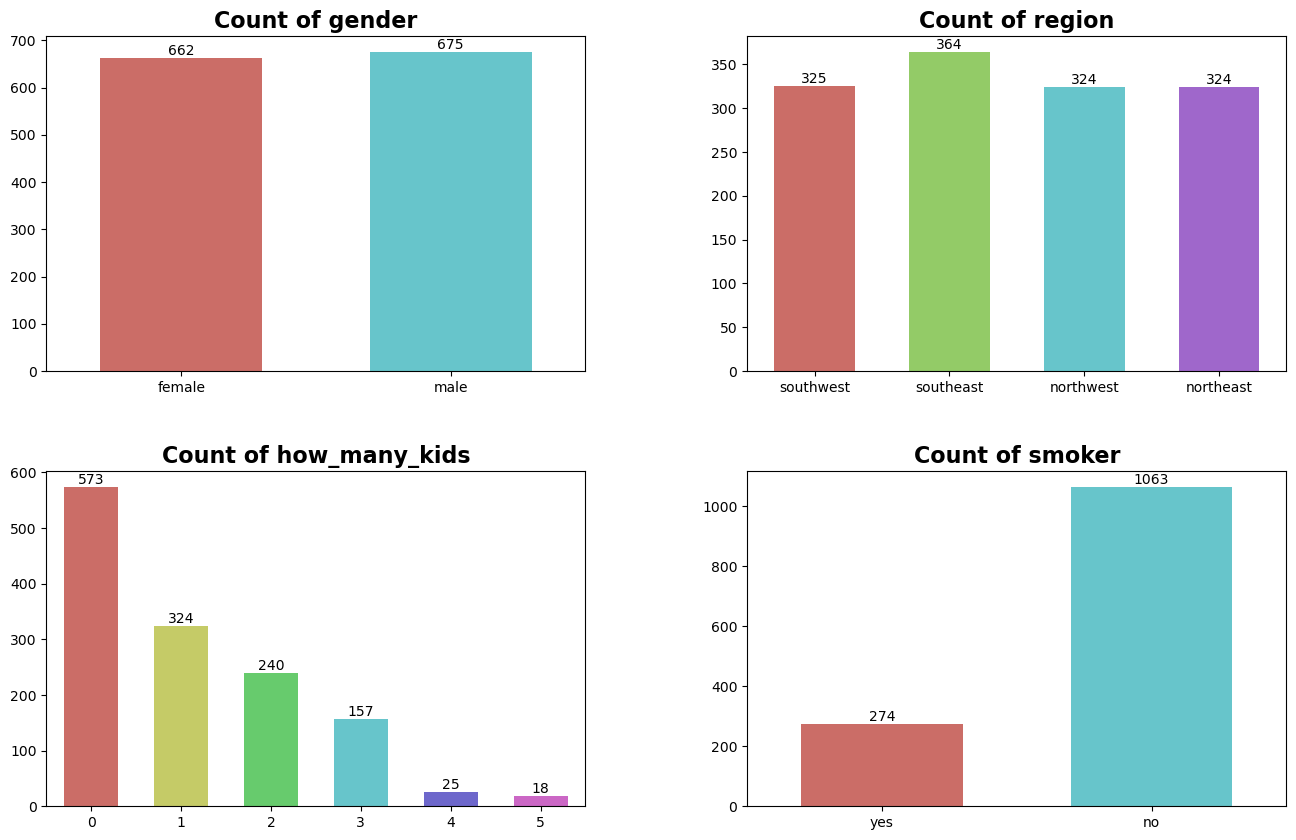

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

features = ['gender', 'region', 'how_many_kids', 'smoker']
for i, feature in enumerate(features):
    ax = axes[i // 2, i % 2] 
    sns.countplot(data=df, x=feature, ax=ax, width=0.6, palette = 'hls')
    ax.set_title(f'Count of {feature}', fontsize=16, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    
   
    for container in ax.containers:
        ax.bar_label(container, fontsize=10)

    


plt.subplots_adjust(wspace=0.3, hspace=0.3) 
plt.show()

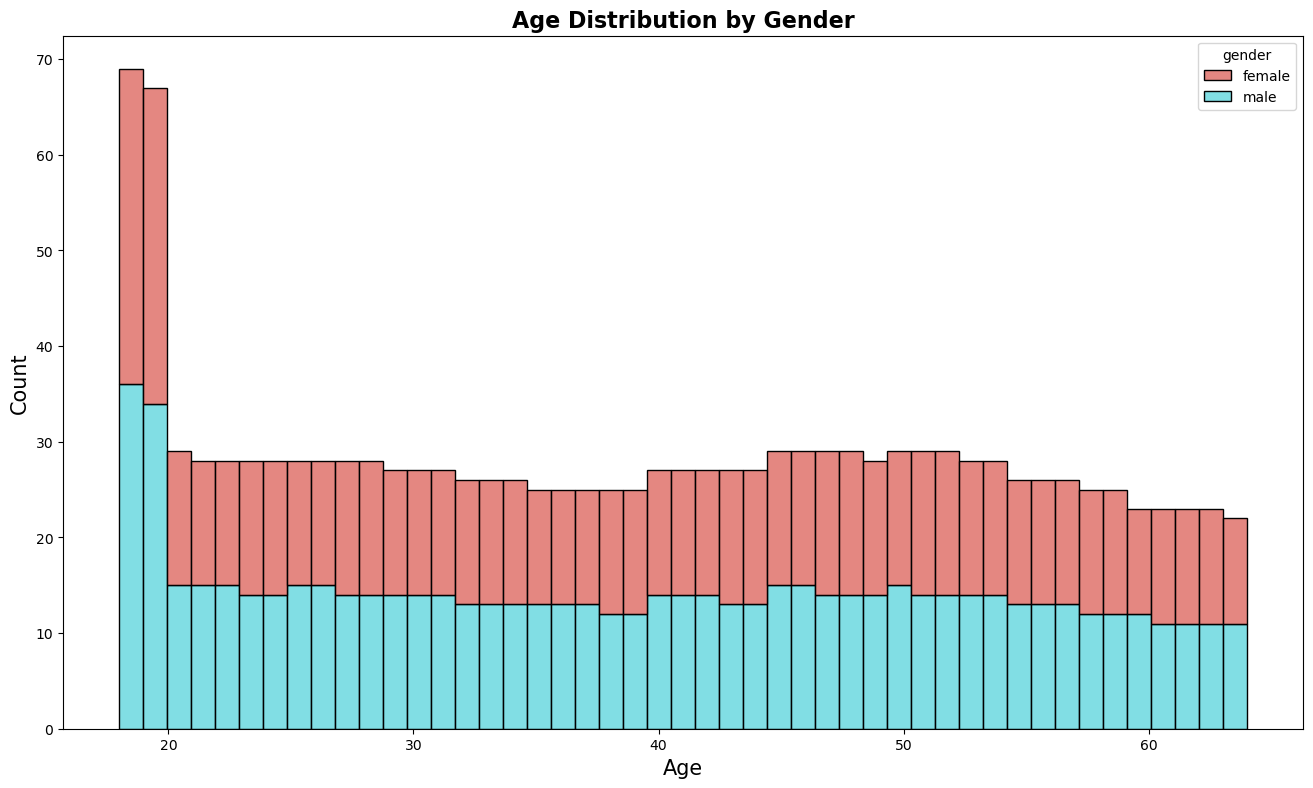

In [18]:
plt.figure(figsize=(16, 9))

sns.histplot(data=df, x='age', hue='gender', multiple='stack', bins=47, palette='hls')

plt.title('Age Distribution by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)


plt.show()

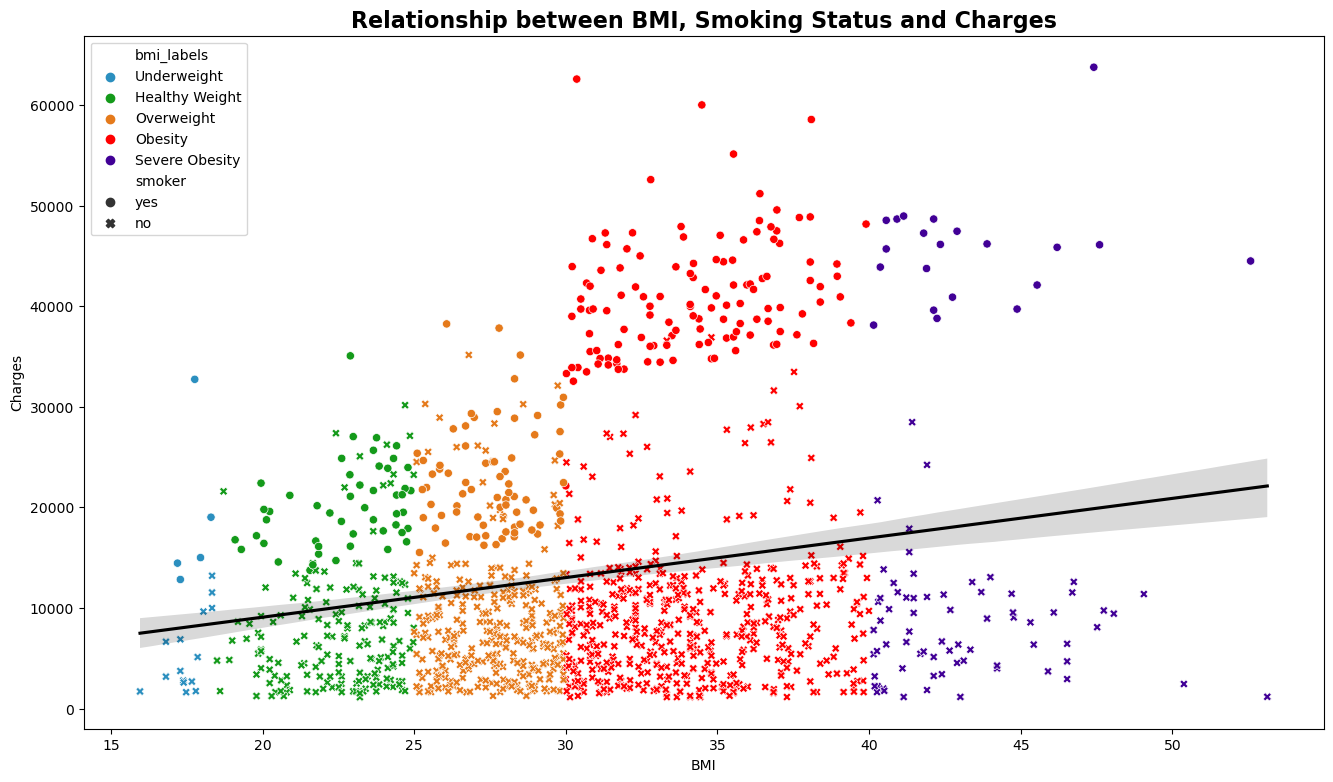

In [19]:
palette = {
    'Underweight': '#2b8fbf',  
    'Healthy Weight': '#149a1a',  
    'Overweight': '#e57a1b',  
    'Obesity': '#FF0000',  
    'Severe Obesity': '#410096'  
}

plt.figure(figsize=(16, 9))

# Scatter plot 
sns.scatterplot(data=df, x='bmi', y='charges', hue='bmi_labels', style='smoker', palette=palette)

# Trend line
sns.regplot(data=df, x='bmi', y='charges', scatter=False, color='black')


plt.title('Relationship between BMI, Smoking Status and Charges', fontsize=16, fontweight='bold')
plt.legend(fontsize='10', loc='upper left')


plt.xlabel('BMI')
plt.ylabel('Charges')

plt.show()

## Machine Learning

### Data Preprocessing

In [22]:
X = df.drop(['charges', 'bmi_labels'], axis=1)
y = df['charges']

cat_cols = ['gender', 'smoker', 'region']
num_cols = ['age', 'bmi', 'how_many_kids']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

### Model Implementation

In [24]:
# Pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', DecisionTreeRegressor())])


model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi',
                                                   'how_many_kids']),
                                                 ('cat', OneHotEncoder(),
                                                  ['gender', 'smoker',
                                                   'region'])])),
                ('regressor', DecisionTreeRegressor())])

### Model Performance

In [26]:
y_pred = model.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R^2 Score: {r2}')


RMSE: 5639.843288275631
R^2 Score: 0.7043934871298783


### Hyperparameter Tuning

In [28]:
param_grid = {
    'regressor__max_depth': [None, 10, 20, 30, 40, 50],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,  
                           scoring='neg_mean_squared_error',  
                           n_jobs=-1,  
                           verbose=1)  

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f'Best Parameters: {best_params}')
print(f'Best Score (Negative MSE): {best_score}')



Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'regressor__max_depth': 10, 'regressor__max_features': 'auto', 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10}
Best Score (Negative MSE): -29010372.180291276


In [29]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R^2 Score: {r2}')

RMSE: 4959.956440641783
R^2 Score: 0.771368718839964


### Original Model vs Tuned Model

In [31]:
score_df = {
    'Model': ['Original Model', 'Tuned Model'],
    'r2_Score': [0.7112, 0.7714],
    'RMSE_Score':[5574.93, 4959.96]
}
score_df = pd.DataFrame(score_df)

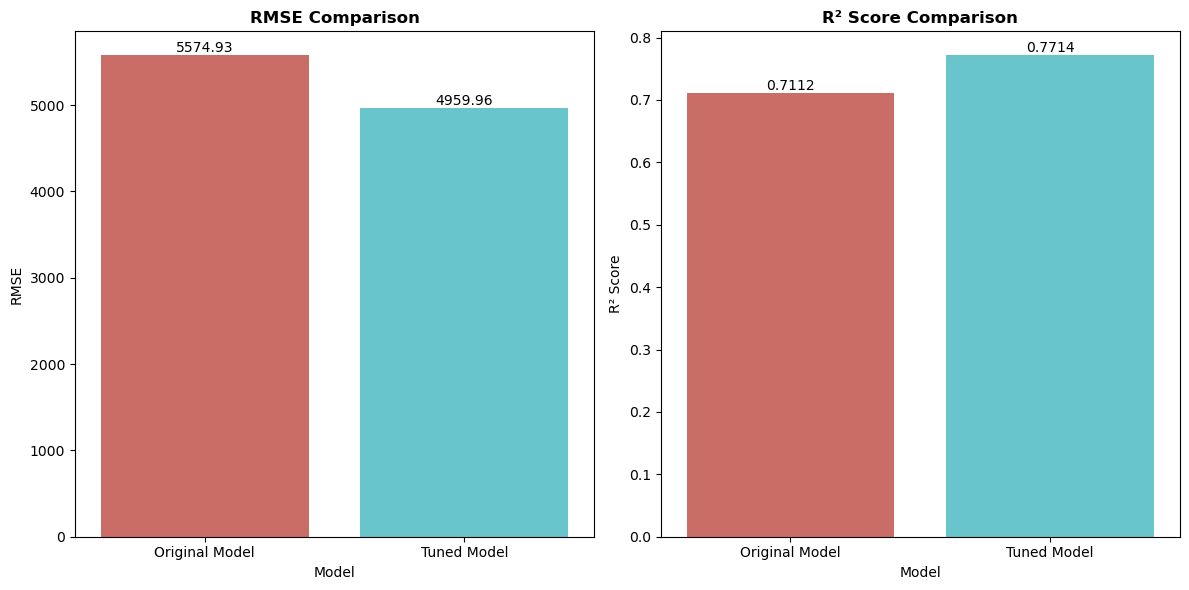

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

#RMSE
sns.barplot(data=score_df, x='Model', y='RMSE_Score', ax=ax1, palette='hls')
ax1.set_xlabel('Model')
ax1.set_ylabel('RMSE')
ax1.set_title('RMSE Comparison',fontweight='bold')


#R² Score
sns.barplot(data=score_df, x='Model', y='r2_Score', ax=ax2, palette='hls')
ax2.set_xlabel('Model')
ax2.set_ylabel('R² Score')
ax2.set_title('R² Score Comparison',fontweight='bold')


for ax in [ax1, ax2]:
    for container in ax.containers:
        ax.bar_label(container, fontsize=10)
        

plt.tight_layout()
plt.show()

### Feature Importance

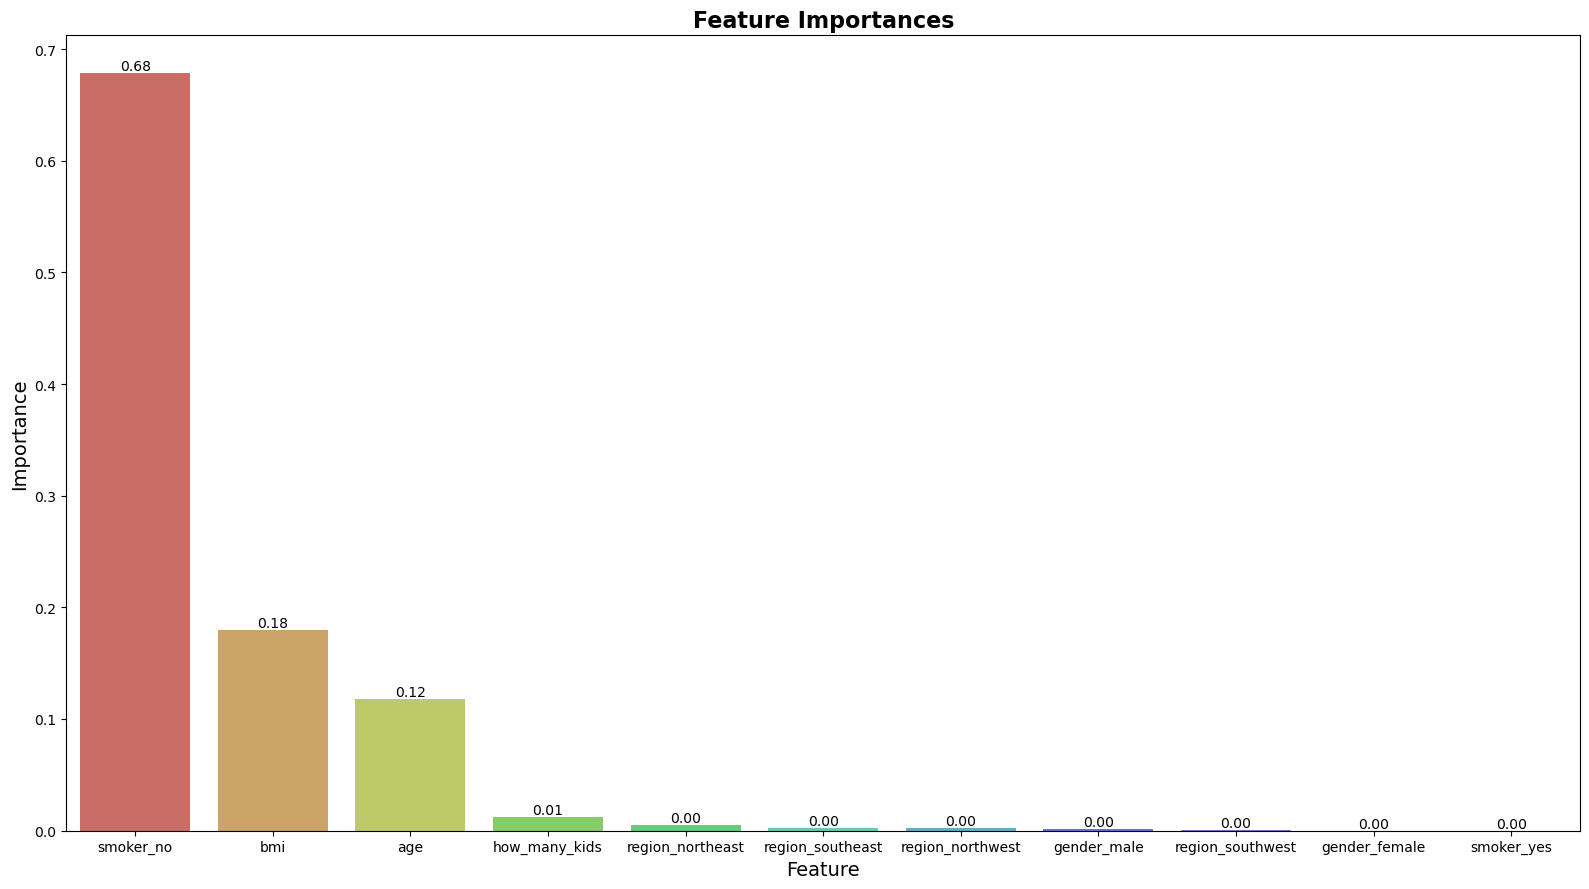

In [34]:
# Feature Importances

importances = best_model.named_steps['regressor'].feature_importances_

cat_feature_names = best_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(cat_cols)
all_feature_names = num_cols + list(cat_feature_names)

feature_importances_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


# Visualising
plt.figure(figsize=(16, 9))
ax = sns.barplot(data=feature_importances_df, x='Feature', y='Importance', palette='hls')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10)


ax.set_title('Feature Importances', fontsize=16, fontweight='bold')
ax.set_xlabel('Feature',fontsize=14)
ax.set_ylabel('Importance',fontsize=14)


plt.tight_layout()
plt.show()

## Project Summary
<p>This project focused on developing and optimizing a Decision Tree Regression model to predict <strong>medical charges</strong> based on various features in the dataset. The key steps and findings are as follows:</p>

<h2>1. Data Preprocessing</h2>
    <p>Applied a <code>ColumnTransformer</code> to preprocess the data, scaling numerical features and encoding categorical variables to prepare them for the model.</p>

<h2>2. Model Pipeline</h2>
    <p>Created a pipeline integrating preprocessing with a <code>DecisionTreeRegressor</code>, facilitating efficient model training and evaluation.</p>

<h2>3. Initial Model Evaluation</h2>
    <p>The baseline model achieved:</p>
    <ul>
        <li><strong>RMSE</strong>: 5541.56</li>
        <li><strong>R<sup>2</sup> Score</strong>: 0.7146</li>
    </ul>

<h2>4. Hyperparameter Tuning</h2>
    <p>Employed GridSearchCV to identify optimal hyperparameters for the Decision Tree Regressor, which led to improved performance:</p>
    <ul>
        <li><strong>Best Parameters</strong>:
            <ul>
                <li><code>max_depth</code>: 10</li>
                <li><code>max_features</code>: 'auto'</li>
                <li><code>min_samples_leaf</code>: 4</li>
                <li><code>min_samples_split</code>: 10</li>
            </ul>
        </li>
        <li><strong>Tuned Model Performance</strong>:
            <ul>
                <li><strong>RMSE</strong>: 4959.96</li>
                <li><strong>R<sup>2</sup> Score</strong>: 0.7714</li>
            </ul>
        </li>
    </ul>

<h2>5. Feature Importance Analysis</h2>
    <ul>
        <li><strong>Strongest Feature</strong>: <code>smoker_no</code> (importance score: <strong>0.6785</strong>) was the most significant predictor of medical charges, showing that non-smoking is relevant with medical charges</li>
        <li><strong>Other Important Features</strong>: <code>bmi</code> (<strong>0.1801</strong>) and <code>age</code> (<strong>0.1176</strong>) also had substantial impacts on charges, reflecting their relevance in determining healthcare costs.</li>
        
 </ul>

<h2 style="color: red;">Conclusion</h2>
    <p>Following the model's tuning, it achieved an <strong>R<sup>2</sup> score of 0.7714</strong>, reflecting its improved ability to explain the variance in medical charges. The feature importance analysis revealed that <strong>age, BMI, and smoking status</strong> are the most crucial factors in predicting medical cost..</p>